<a href="https://colab.research.google.com/github/anaconda121/Deep-Learning/blob/main/Tensorflow/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Tanish Tyagi C Format

## Imports

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np 

## Loading Data

In [23]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

## EDA

In [24]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


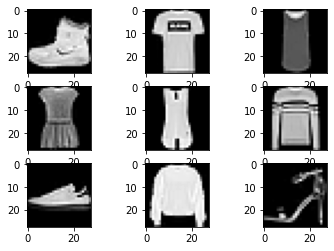

In [26]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i].reshape((28,28)), cmap=plt.get_cmap('gray'))

## Define Model

In [27]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(10),
#   tf.keras.layers.Softmax()
# ])
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Model Training and Evaulation

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), verbose=2)

Epoch 1/25
1875/1875 - 56s - loss: 0.1562 - accuracy: 0.9406 - val_loss: 0.2665 - val_accuracy: 0.9134
Epoch 2/25
1875/1875 - 56s - loss: 0.1380 - accuracy: 0.9477 - val_loss: 0.2881 - val_accuracy: 0.9117
Epoch 3/25
1875/1875 - 56s - loss: 0.1202 - accuracy: 0.9544 - val_loss: 0.3099 - val_accuracy: 0.9071
Epoch 4/25
1875/1875 - 58s - loss: 0.1053 - accuracy: 0.9596 - val_loss: 0.3275 - val_accuracy: 0.9104
Epoch 5/25
1875/1875 - 56s - loss: 0.0915 - accuracy: 0.9654 - val_loss: 0.3433 - val_accuracy: 0.9084
Epoch 6/25
1875/1875 - 56s - loss: 0.0847 - accuracy: 0.9678 - val_loss: 0.3647 - val_accuracy: 0.9097
Epoch 7/25
1875/1875 - 56s - loss: 0.0742 - accuracy: 0.9713 - val_loss: 0.3954 - val_accuracy: 0.9055
Epoch 8/25
1875/1875 - 56s - loss: 0.0677 - accuracy: 0.9744 - val_loss: 0.4206 - val_accuracy: 0.9065
Epoch 9/25
1875/1875 - 56s - loss: 0.0659 - accuracy: 0.9752 - val_loss: 0.4430 - val_accuracy: 0.9124
Epoch 10/25
1875/1875 - 56s - loss: 0.0551 - accuracy: 0.9796 - val_loss:

In [32]:
test = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - loss: 0.7544 - accuracy: 0.9007


## Metrics

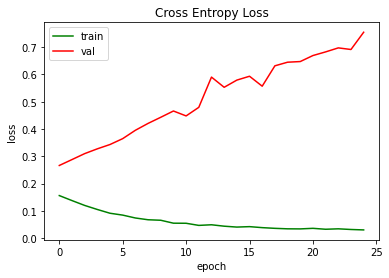

In [36]:
# for i in range(len(history)):
  # plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='green', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

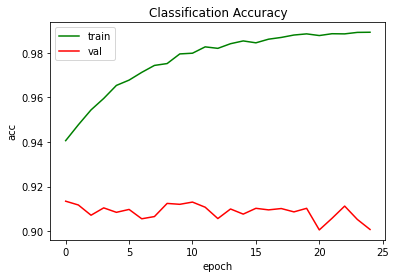

In [37]:
# for i in range(len(histories)):
  # plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## Analyzing Model Predictions on Test Set

In [41]:
def plot_img(i, pred, ground_truth, img):
  pred, ground_truth, img = pred[i], ground_truth[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(pred)
  if predicted_label == ground_truth:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred),
                                class_names[ground_truth]),
                                color=color)

In [42]:
def plot_probas(i, pred, ground_truth):
    pred, ground_truth = pred[i], ground_truth[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plot= plt.bar(range(10), pred, color="black")
    plt.ylim([0,1])
    predicted_label = np.argmax(pred)
    
    plot[predicted_label].set_color('red')
    plot[ground_truth].set_color('blue')

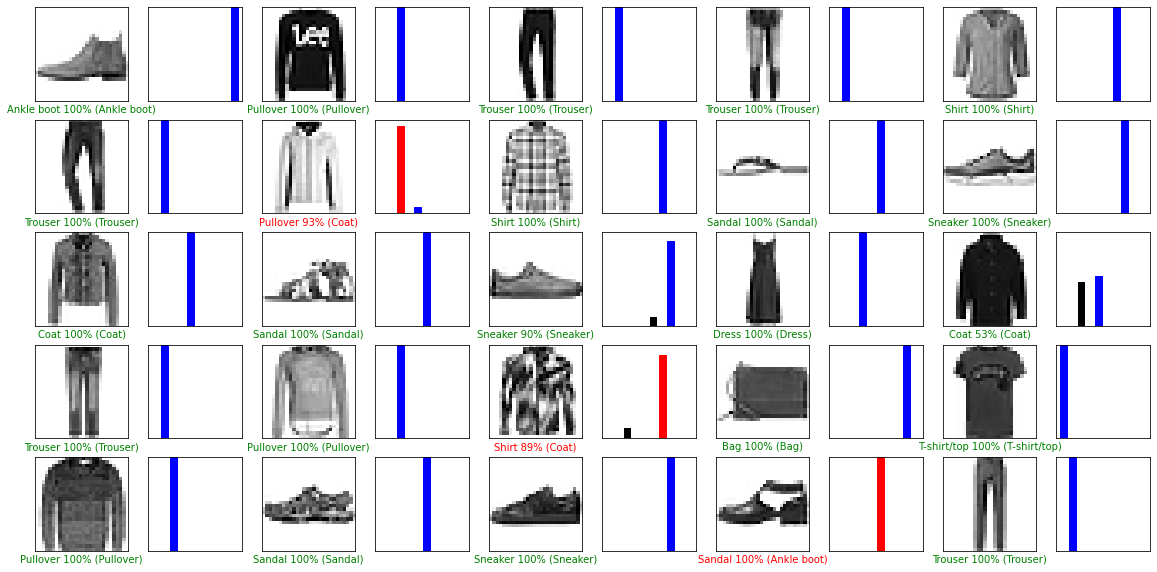

In [43]:
predictions = model.predict(x_test)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions on test set, DNN")

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_probas(i, predictions, y_test)